In [3]:
#import necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score


In [4]:
# Display the first 5 rows
df = pd.read_csv("data/housing.csv")

In [5]:

df.dropna(inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 20433 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20433 non-null  float64
 1   latitude            20433 non-null  float64
 2   housing_median_age  20433 non-null  float64
 3   total_rooms         20433 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20433 non-null  float64
 6   households          20433 non-null  float64
 7   median_income       20433 non-null  float64
 8   median_house_value  20433 non-null  float64
 9   ocean_proximity     20433 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.7+ MB


In [6]:
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


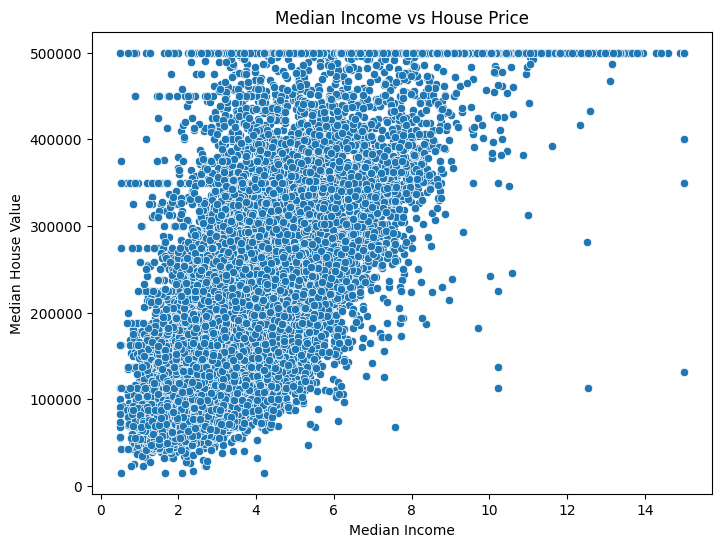

In [7]:
# Scatterplot: Median Income vs House Price
plt.figure(figsize=(8, 6))
sns.scatterplot(x='median_income', y='median_house_value', data=df)
plt.title('Median Income vs House Price')
plt.xlabel('Median Income')
plt.ylabel('Median House Value')
plt.show()
    

In [8]:
#Split data into features and target
X = df.drop(['median_income', 'ocean_proximity'], axis=1)
y = df['median_house_value']

In [9]:
#Split into training and testing set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [10]:
#Train Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [11]:

y_pred = model.predict(X_test)

In [12]:
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean_Squared_Error: {mse:.2f}")
print(f"R-2 Score: {r2:.2f}")

Mean_Squared_Error: 0.00
R-2 Score: 1.00


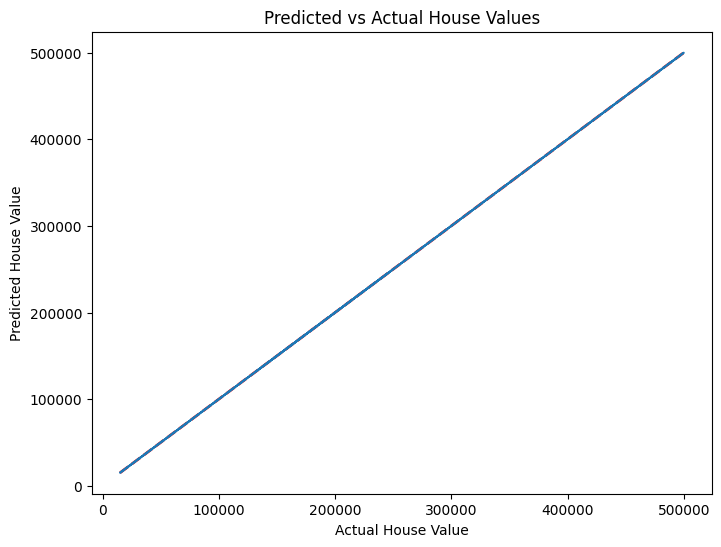

In [23]:
plt.figure(figsize=(8, 6))
# plt.scatter(y_test, y_pred, alpha=0.5, color='steelblue')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', linewidth=2)
plt.plot(y_test, y_pred)
plt.xlabel('Actual House Value')
plt.ylabel('Predicted House Value')
plt.title('Predicted vs Actual House Values')
plt.show()